In [2]:
import pyrealsense2 as rs
import numpy as np
import sys
import matplotlib.pyplot as plt

sys.path.append("../")

from SurfaceContact.control import SurfaceContactControl

%load_ext autoreload
%autoreload 2


In [3]:
pipeline = rs.pipeline()
pipeline.start()


In [5]:
frames = pipeline.wait_for_frames()
rgb = frames.get_color_frame()
rgb_img = np.asanyarray(rgb.get_data())
depth = frames.get_depth_frame()

In [6]:
pc = rs.pointcloud()
points = pc.calculate(depth)
v = points.get_vertices()
verts = np.asanyarray(v).view(np.float32).reshape(-1, 3) 

np.save('pointcloud.npy', verts)
depth_img = np.asanyarray(depth.get_data())

## Display pointcloud

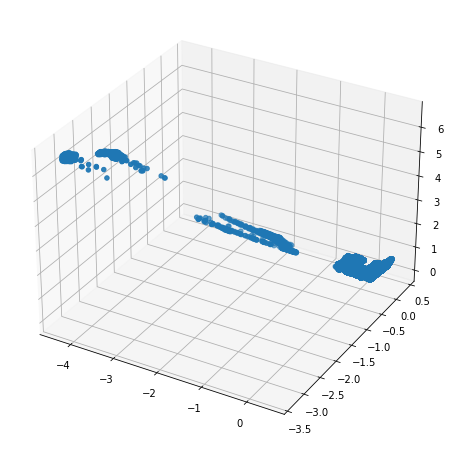

In [7]:
from mpl_toolkits.mplot3d import proj3d
x = verts[:,0]
y = verts[:,1]
z = verts[:,2]
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z)
plt.show()

In [12]:
v = verts.reshape(-1,848,3)

In [33]:
v.shape

(480, 848, 3)

**Pointcloud data interpretation**
- The raw pointcloud data is a (407040,) list of 3-tuples. 407040 = 480 x 848 = image height x image width. 
- The raw pointcloud data is reshaped into the variable `v` above, a (480,840,3) array.
- Each point in the pointcloud is a 3D vector (x,y,z), meaning there is a non-empty cell in space located at (x,y,z). 

**Pointcloud coordinate - Pixel Coordinate Conversion**
- The center pixel of the depth/RGB image, at row 210 and column 424, corresponds to x=0,y=0 position in continuous coordinates.
- The x=0,y=0,z=0 position in continuous coordinates is located at position of the camera itself. 
  - Continuous z direction <=> The depth direction. 
  - Continuous x direction <=> The right-width direction of the pixel coordinates. 
  - Continuous y direction <=> The down-height direction of the pixel coordinates.
- The continuous coordinate (x,y,z) of the particle at pixel coordinate (row,col) is `v[row,col,:]`.
- If the depth information at a certain pixel is N/A, its cooresponding (x,y,z) will be (0,0,0) exactly (a bit confusing, but just remember (0,0,0) is reserved for unavailable pixels). 

## Display depth image

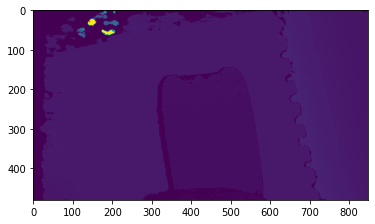

In [8]:
plt.imshow(depth_img)

## Display RGB Image

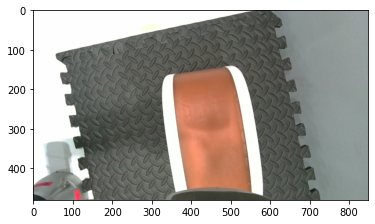

In [9]:
plt.imshow(rgb_img)

In [10]:
pipeline.stop()